### Data:

Age: Age of pregnant women.

SystolicBP: Upper value of Blood Pressure in mmHg

DiastolicBP: Lower value of Blood Pressure in mmHg

BS: Blood glucose levels in mmol/L.

HeartRate: Heart rate in beats per minute.

Risk Level: Predicted Risk Intensity Level during pregnancy.

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [128]:
df = pd.read_csv('MaternalHealthRiskDataSet.csv')

In [129]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [131]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [132]:
df.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [133]:
df['RiskLevel'].unique()

array(['high risk', 'low risk', 'mid risk'], dtype=object)

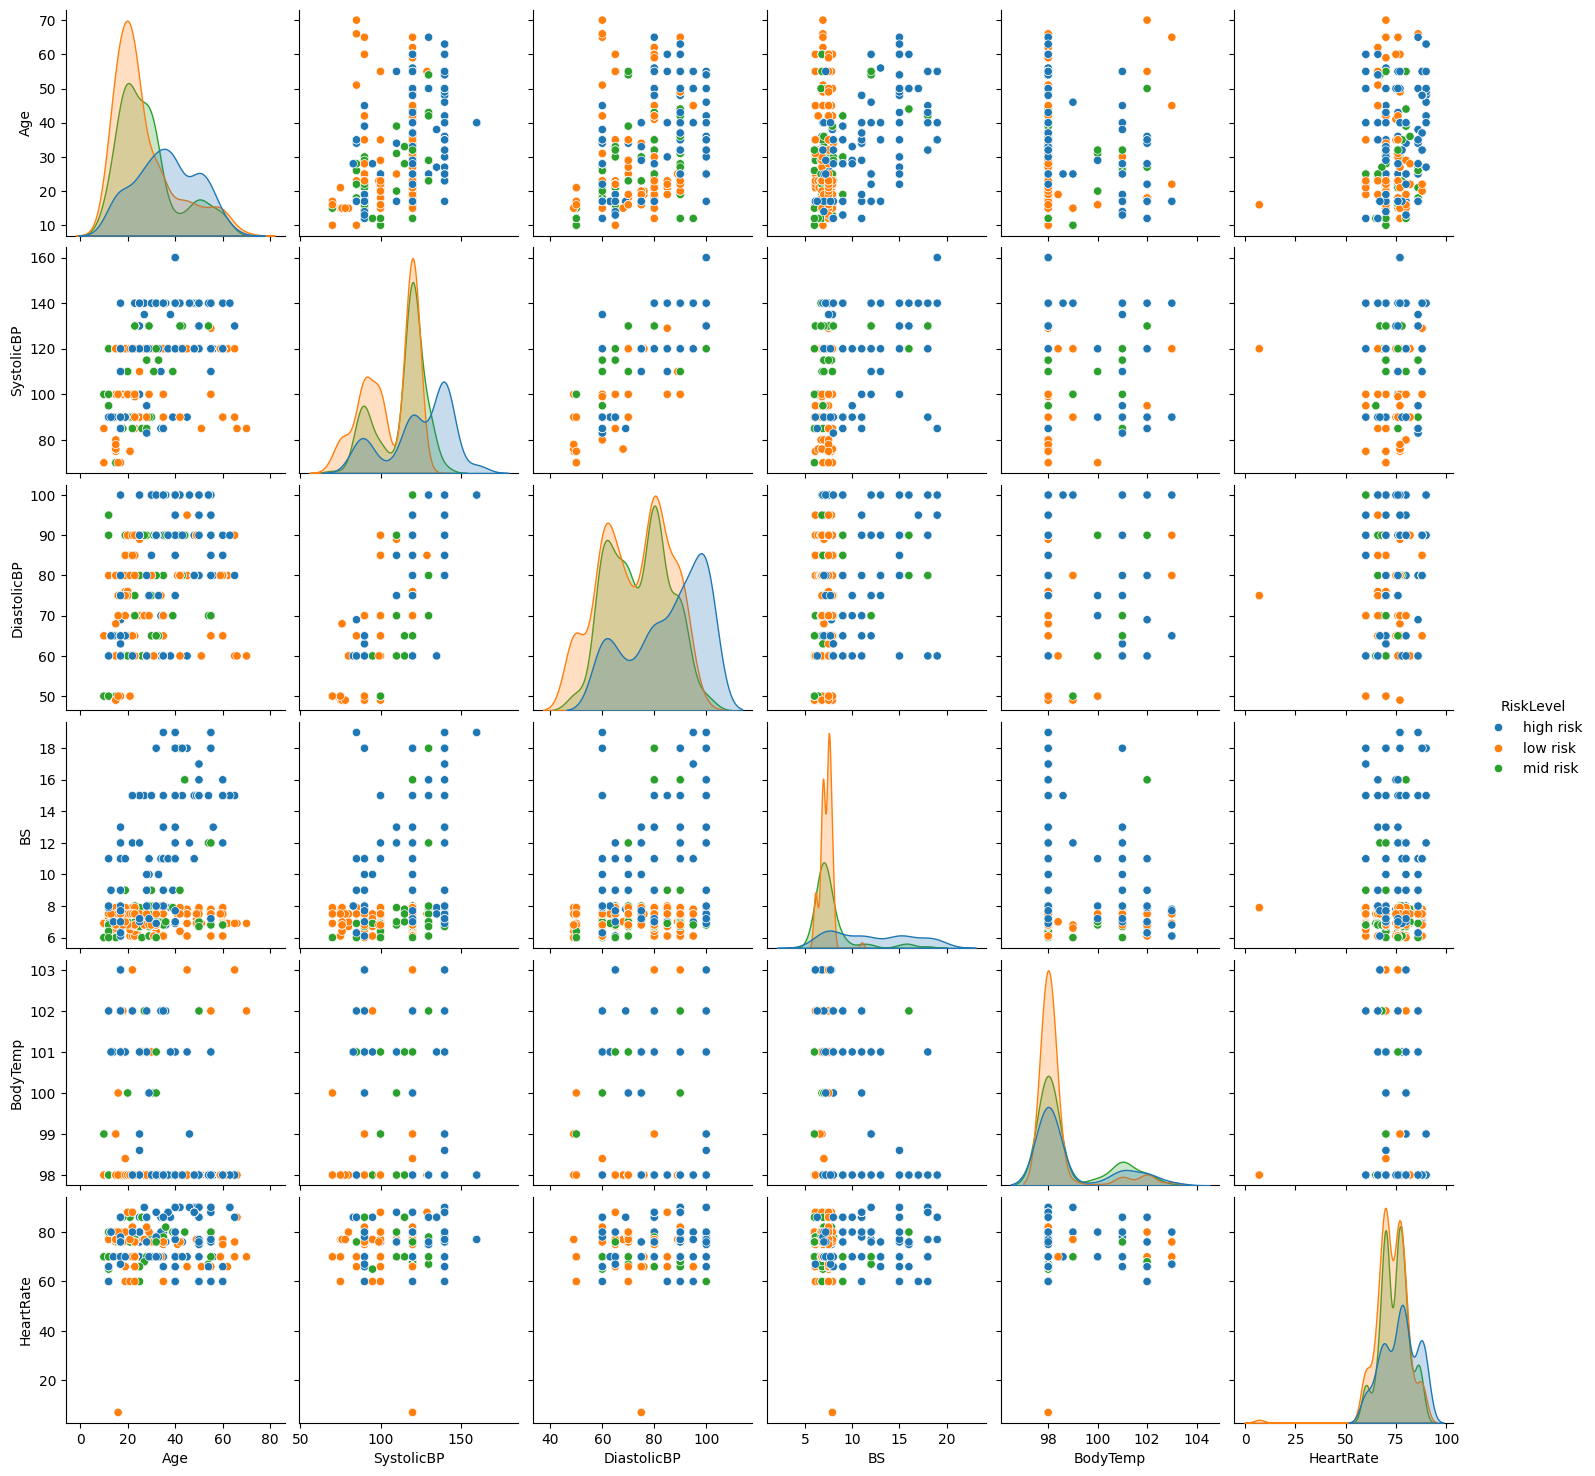

In [134]:
sns.pairplot(df,hue='RiskLevel')

<Axes: xlabel='Age', ylabel='count'>

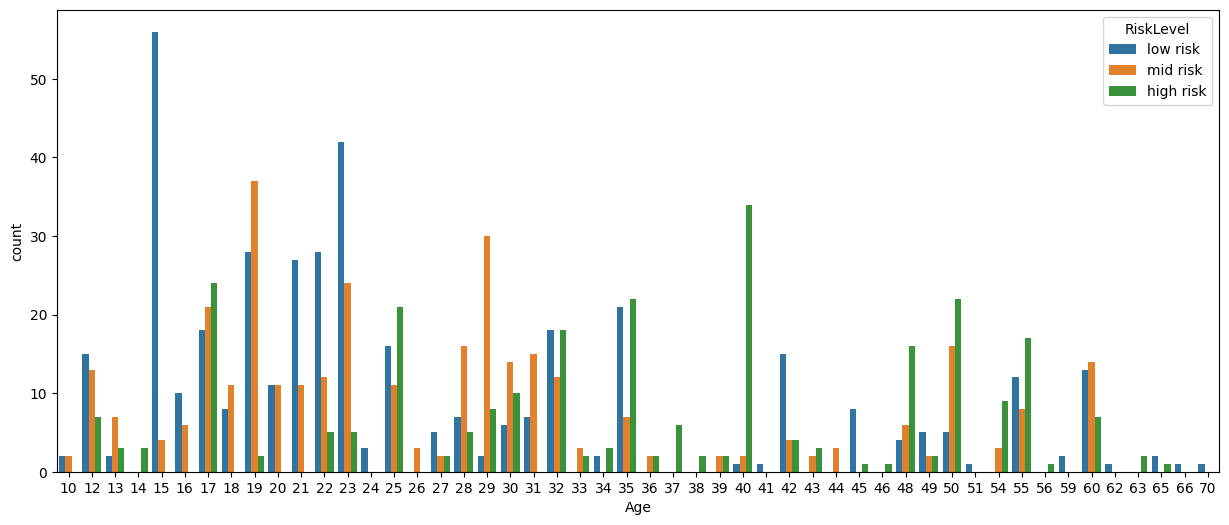

In [135]:
plt.figure(figsize=(15,6))
sns.countplot(x='Age', data=df, hue='RiskLevel')

### Observation

<Axes: ylabel='count'>

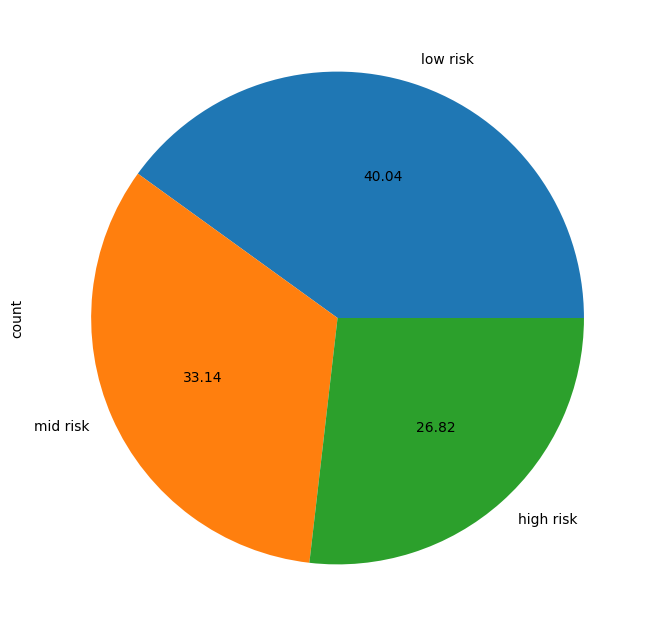

In [136]:
df['RiskLevel'].value_counts().plot.pie(autopct='%.2f',figsize=(8,8))

<Axes: >

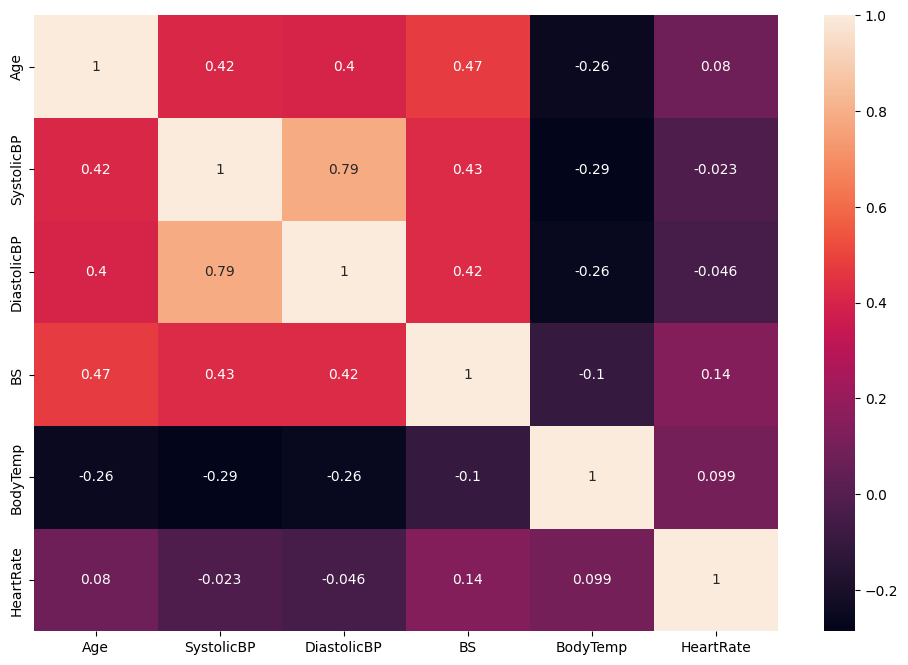

In [137]:
numeric_df = df.select_dtypes(include=[np.number])
correlation = numeric_df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)

In [138]:
df['RiskLevel']=df['RiskLevel'].map({'low risk':0,'mid risk':1,'high risk':2})

<Axes: xlabel='Age', ylabel='Count'>

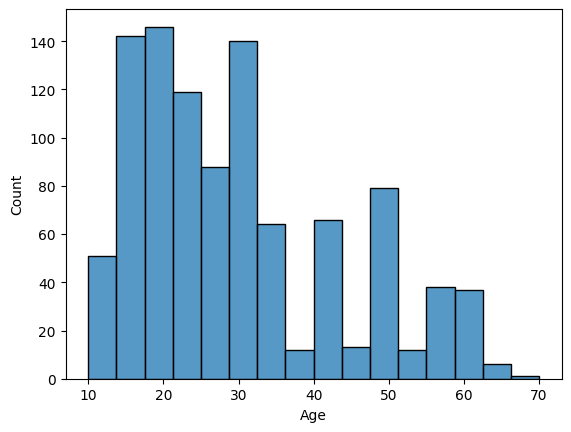

In [139]:
sns.histplot(df['Age'],)

<Axes: xlabel='DiastolicBP', ylabel='SystolicBP'>

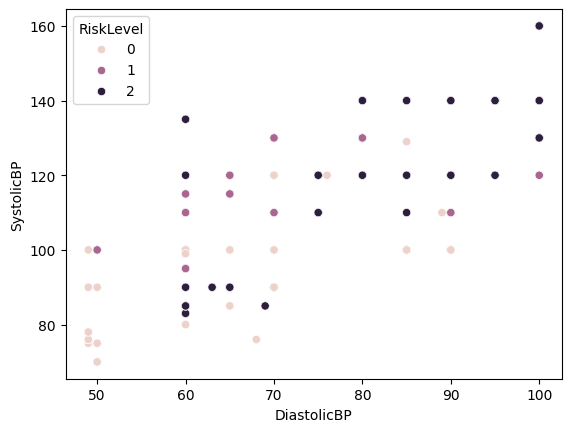

In [140]:
sns.scatterplot(x='DiastolicBP', y='SystolicBP', hue='RiskLevel', data=df)

<Axes: xlabel='RiskLevel', ylabel='BS'>

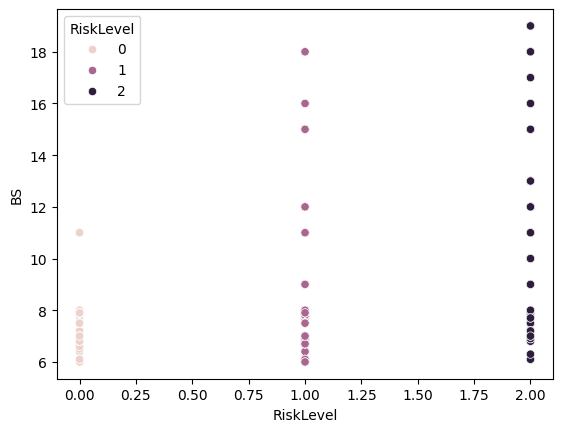

In [141]:
sns.scatterplot(x='RiskLevel',y='BS',hue='RiskLevel',data=df)

<Axes: xlabel='Age', ylabel='BS'>

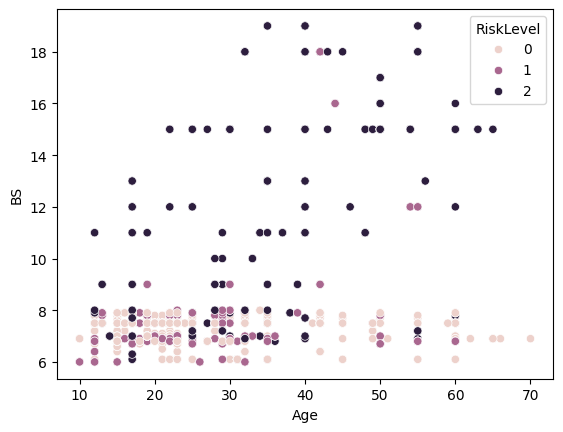

In [142]:
sns.scatterplot(x='Age',y='BS',hue='RiskLevel',data=df)

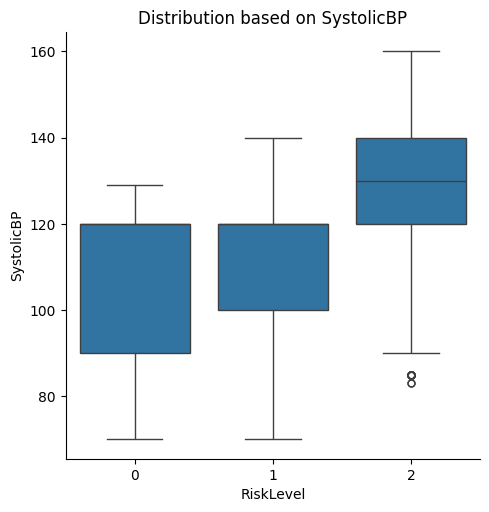

In [143]:
sns.catplot(x="RiskLevel", y="SystolicBP", data=df, kind="box").set(title="Distribution based on SystolicBP")

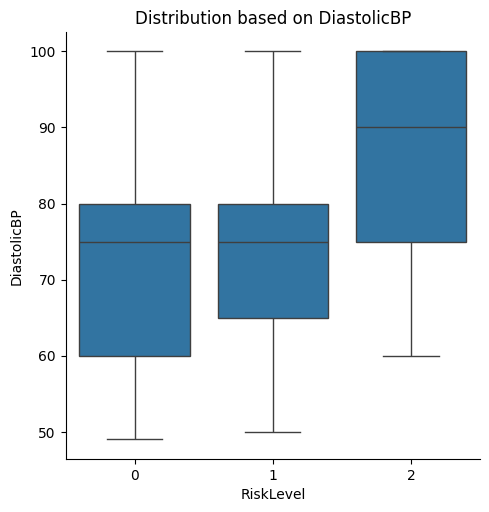

In [144]:
sns.catplot(x="RiskLevel", y="DiastolicBP", data=df, kind="box").set(title="Distribution based on DiastolicBP")

In [145]:
X= df.drop('RiskLevel',axis=1)
y= df['RiskLevel']

In [146]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.25,random_state=0)

In [147]:
y_train.value_counts()

RiskLevel
0    311
1    244
2    205
Name: count, dtype: int64

In [148]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
pred= model.predict(X_test)

<Axes: >

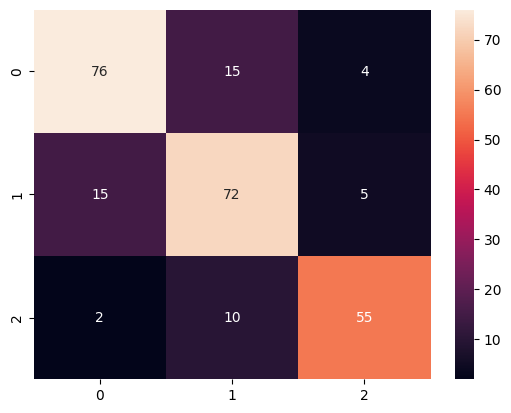

In [149]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
sns.heatmap(confusion_matrix(y_test,pred),annot=True)

In [150]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81        95
           1       0.74      0.78      0.76        92
           2       0.86      0.82      0.84        67

    accuracy                           0.80       254
   macro avg       0.81      0.80      0.80       254
weighted avg       0.80      0.80      0.80       254



In [151]:
from sklearn.preprocessing import StandardScaler    
scale = StandardScaler()  
X_train= scale.fit_transform(X_train)    
X_test= scale.transform(X_test) 

In [152]:
X_train

array([[-0.60158195,  0.36677854,  0.25283285, -0.55181494,  3.07668957,
         0.19721219],
       [-0.97100848, -1.27615872, -0.83853197, -0.30466871,  3.07668957,
        -0.89239313],
       [-0.52769664,  1.46207005,  0.98040939, -0.58270822, -0.49582781,
        -0.52919136],
       ...,
       [-0.45381133,  0.36677854,  0.25283285, -0.36645527, -0.49582781,
        -1.01346039],
       [ 0.35892704, -0.72851297, -0.47474369, -0.36645527, -0.49582781,
        -1.01346039],
       [ 0.13727112,  1.46207005,  1.70798594, -0.55181494, -0.49582781,
         0.43934671]])

In [153]:
model5= DecisionTreeClassifier(criterion='gini', random_state=20)  
model5.fit(X_train, y_train) 
y_pred= model5.predict(X_test)  

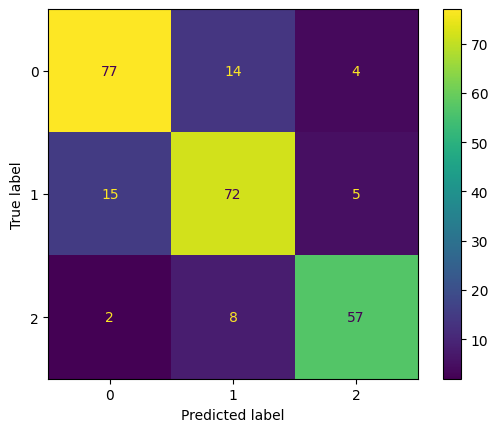

In [154]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model5, X_test, y_test)

In [155]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81        95
           1       0.77      0.78      0.77        92
           2       0.86      0.85      0.86        67

    accuracy                           0.81       254
   macro avg       0.82      0.81      0.82       254
weighted avg       0.81      0.81      0.81       254



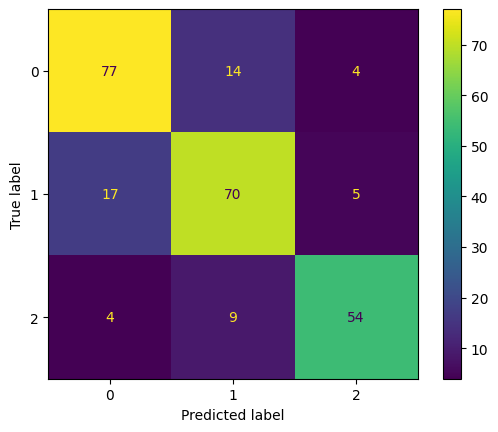

In [156]:
from sklearn.ensemble import RandomForestClassifier

RF= RandomForestClassifier(criterion='gini')
RF.fit(X_train,y_train)

predict=RF.predict(X_test)
ConfusionMatrixDisplay.from_estimator(RF, X_test, y_test)

In [157]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80        95
           1       0.75      0.76      0.76        92
           2       0.86      0.81      0.83        67

    accuracy                           0.79       254
   macro avg       0.80      0.79      0.80       254
weighted avg       0.79      0.79      0.79       254



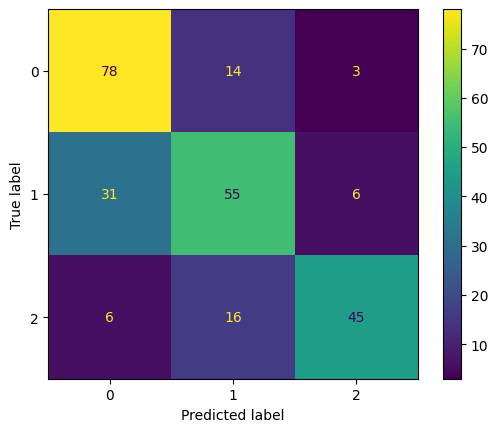

In [158]:
from sklearn.neighbors import KNeighborsClassifier
import math

math.sqrt(len(y_test))
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred=knn.predict(X_test)
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)

In [159]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81        95
           1       0.77      0.78      0.77        92
           2       0.86      0.85      0.86        67

    accuracy                           0.81       254
   macro avg       0.82      0.81      0.82       254
weighted avg       0.81      0.81      0.81       254



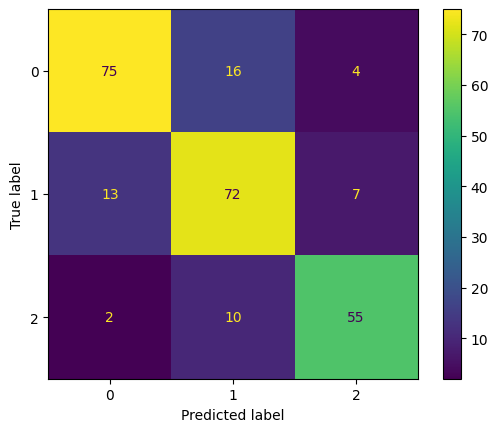

In [160]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train,y_train)
xbg_pred=xgb.predict(X_test)
ConfusionMatrixDisplay.from_estimator(xgb, X_test, y_test)

In [161]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81        95
           1       0.77      0.78      0.77        92
           2       0.86      0.85      0.86        67

    accuracy                           0.81       254
   macro avg       0.82      0.81      0.82       254
weighted avg       0.81      0.81      0.81       254



In [162]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    "learning_rate": [0.5,1,3,5],
    "reg_lambda": [0, 1,5, 10,20]
}
grid = GridSearchCV(xgb, param_grid,cv=3, scoring="roc_auc", n_jobs=-1)
grid.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     objective='multi:softprob', ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.5, 1, 3, 5],
                         'reg_lambda': [0, 1, 5, 10, 20]},
             scoring='roc_auc')

In [163]:
grid.best_params_

{'learning_rate': 0.5, 'reg_lambda': 0}

In [164]:
grid.best_score_

nan

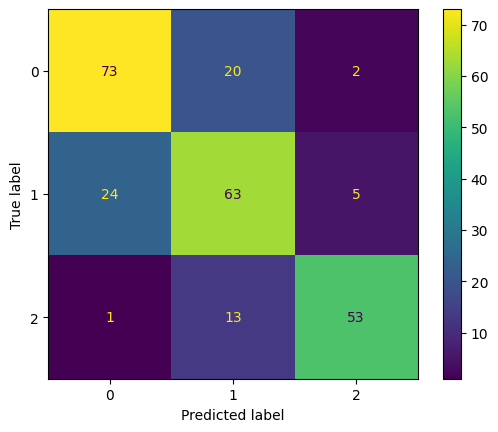

In [165]:
xgb = XGBClassifier(colsample_bytree= 0.5,gamma=0,learning_rate=0.1,max_depth=3,subsample=0.8,reg_lambda=0)
xgb.fit(X_train,y_train)
xgb_pred=xgb.predict(X_test)
ConfusionMatrixDisplay.from_estimator(xgb, X_test, y_test)

In [166]:
print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.74      0.77      0.76        95
           1       0.66      0.68      0.67        92
           2       0.88      0.79      0.83        67

    accuracy                           0.74       254
   macro avg       0.76      0.75      0.75       254
weighted avg       0.75      0.74      0.75       254



In [167]:
param_grid={'n_estimators': [200,300,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [10,15,20,30],
    'criterion' :['gini', 'entropy']
    
}
gridsearchcv=GridSearchCV(RF,param_grid,cv=5)
gridsearchcv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 300, 500]})

In [168]:
gridsearchcv.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'log2',
 'n_estimators': 300}

In [169]:
gridsearchcv.best_score_

0.8618421052631579

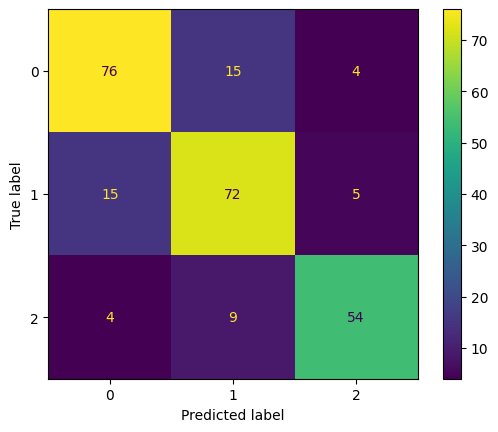

In [170]:
RF2= RandomForestClassifier(criterion='entropy',max_depth=30,max_features='sqrt',n_estimators=500)
RF2.fit(X_train,y_train)
rf_pred=RF2.predict(X_test)
ConfusionMatrixDisplay.from_estimator(RF2, X_test, y_test)

In [171]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        95
           1       0.75      0.78      0.77        92
           2       0.86      0.81      0.83        67

    accuracy                           0.80       254
   macro avg       0.80      0.80      0.80       254
weighted avg       0.80      0.80      0.80       254



In [172]:
from sklearn.svm import SVC
svc= SVC(kernel='poly')
svc.fit(X_train,y_train)
svc_pred=svc.predict(X_test)

In [173]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        95
           1       0.75      0.78      0.77        92
           2       0.86      0.81      0.83        67

    accuracy                           0.80       254
   macro avg       0.80      0.80      0.80       254
weighted avg       0.80      0.80      0.80       254



In [174]:
import pickle
filename = 'maternal_health_risk.sav'
pickle.dump(model,open(filename,'wb'))

In [175]:
loaded_model = pickle.load(open('maternal_health_risk.sav','rb'))

In [176]:
input_data = (23,130,70,7.01,98,78)

input_data_as_array = np.asarray(input_data)

input_data_reshaped = input_data_as_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print("You have",prediction[0])

You have 1
